# Linear Regression

#### Ref: 1041003(Weight Prediction) - Simple Linear Regression

### Problem Statement:
Here Height is independent variable(x) and weight is dependable varibale (y)
Our target is to find out weight of a person depending on his height

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.shape

(3501, 2)

In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
# Check for missing data
print('Missing Data\n', df.isna())
print('Missing Values\n', df.isnull())

Missing Data
       Height  Weight
0      False   False
1      False   False
2      False   False
3      False   False
4      False   False
...      ...     ...
3496   False   False
3497   False   False
3498   False   False
3499   False   False
3500   False   False

[3501 rows x 2 columns]
Missing Values
       Height  Weight
0      False   False
1      False   False
2      False   False
3      False   False
4      False   False
...      ...     ...
3496   False   False
3497   False   False
3498   False   False
3499   False   False
3500   False   False

[3501 rows x 2 columns]


In [6]:
# Print only missing data
print('Filter based on columns: \n', df[df.isnull().any(axis=1)])

Filter based on columns: 
 Empty DataFrame
Columns: [Height, Weight]
Index: []


In [7]:
# Sum up the missing values
print('Sum up the missing values: \n', df.isnull().sum())

Sum up the missing values: 
 Height    0
Weight    0
dtype: int64


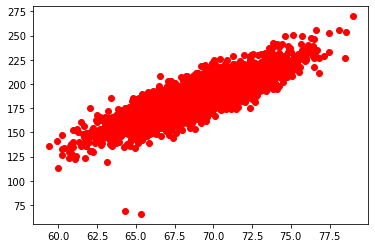

In [8]:
plt.scatter(df.Height, df.Weight, c='r' )

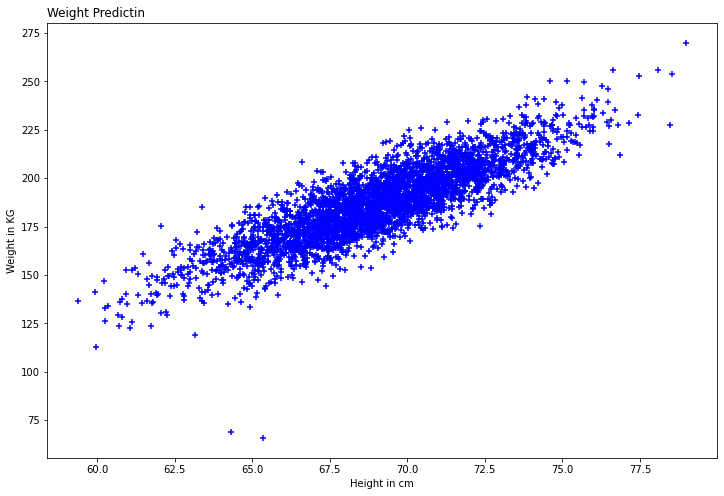

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(df['Height'], df['Weight'], color='blue', marker='+')
plt.xlabel('Height in cm')
plt.ylabel('Weight in KG')
plt.title('Weight Predictin', loc='left')
plt.show()

In [10]:
len(df.Height)

3501

## Variable Declaration

In [11]:
x = df[['Height']]  # Ind Var | 2D
y = df['Weight']    # Dep Var 

# Split the Data

In [12]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts (x, y, train_size=.70, random_state=42)

In [13]:
# Verifty Train & test Size (X train & test)
print('Train Size:')
print(f"train Size : ", xtrain.shape)    # 3501 x .7 = 2450
print(f"xtest Size: ", xtest.shape)

print ("Test Size:")
print(f"ytrain Size : ", ytrain.shape)
print(f"ytest Size : ", ytest.shape)

Train Size:
train Size :  (2450, 1)
xtest Size:  (1051, 1)
Test Size:
ytrain Size :  (2450,)
ytest Size :  (1051,)


In [14]:
xtrain.head()

,Height
1374,75.155410
231,71.968306
1769,69.963912
1812,66.475562
2658,72.731788


In [15]:
ytrain.head()   # ytran is the corresponding value(target) of xtrain, same index number

1374    214.370580
231     201.528177
1769    191.065448
1812    197.646409
2658    213.683943
Name: Weight, dtype: float64

# Model

In [16]:
# Import Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train/fit the Model:
lr.fit(xtrain, ytrain) # Train the model by training set (xtrain & corresponding ytrain values)

LinearRegression()

In [17]:
# Find slop & intercept
print(f"slop or coefficient (w) is: ", lr.coef_)
print(f"intercept b: ", lr.intercept_)

slop or coefficient (w) is:  [5.95092905]
intercept b:  -224.00779357167542


In [18]:
# y = mx+c or y = wx + b
w = lr.coef_
b = lr.intercept_

# Prediction

### A. Prediction by Formula y = wx +b

In [22]:
x = 75   # [ When x / Height assumed by 75 inch]
y = (w * x) + b
y               # actual was 214.370580

array([222.31188547])

### B. Prediction by Trained Model

In [23]:
lr.predict([[75]])

array([222.31188547])

### C. Prediction on Full Dataset, Regardless Train or Test, total will be 3501 predidction

In [24]:
lr.predict(df[['Height']])

array([215.45056555, 185.30843762, 217.01618578, ..., 215.84054261,
       177.0611446 , 208.85665635])

### D. Actual Vs Predicted Result

In [28]:
df['Prediction'] = lr.predict(df[['Height']])
df.head()

,Height,Weight,Prediction
0,73.847017,241.893563,215.450566
1,68.781904,162.310473,185.308438
2,74.110105,212.740856,217.016186
3,71.730978,220.042470,202.858170
4,69.881796,206.349801,191.853816


### E. Prediction on Test Values

In [29]:
lr.fit(xtest, ytest)
testing = lr.predict(xtest)
testing

array([194.99121605, 176.73897536, 187.92212258, ..., 151.26093108,
       177.27969634, 179.46109106])

In [30]:
testing.shape

(1051,)

In [33]:
# Actual test values (1051 actual values)
ytest

# Testing Error = testing - ytest

211     193.346560
1454    182.898115
2176    175.832447
912     228.707301
921     217.561415
           ...    
1334    179.352182
2501    165.784742
801     147.901820
2113    177.375008
1377    164.933108
Name: Weight, Length: 1051, dtype: float64

# Evaluation

#### MSE - Error Calcuatrion - Testing

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, lr.predict(xtest))
mse

102.54435545944825

#### MAE - Error Calcuatrion - Testing

In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, lr.predict(xtest))
mae

8.223151851687492

# Best Fit Line

#### A. Visualization with Xtest Data

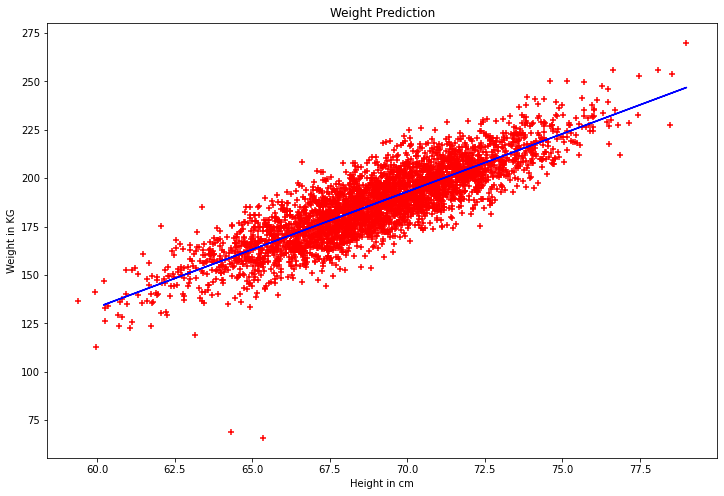

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(df['Height'], df['Weight'], marker='+', c='r')
plt.plot(xtest, lr.predict(xtest), color='blue') # xtest: actual data, xtest(predict): pricted values by xtest, same feature (actual vs predict)
plt.xlabel('Height in cm')
plt.ylabel('Weight in KG')
plt.title("Weight Prediction")
plt.show()

In [40]:
lr.predict([[80]])

array([252.83168135])

#### B. Visualization with all data

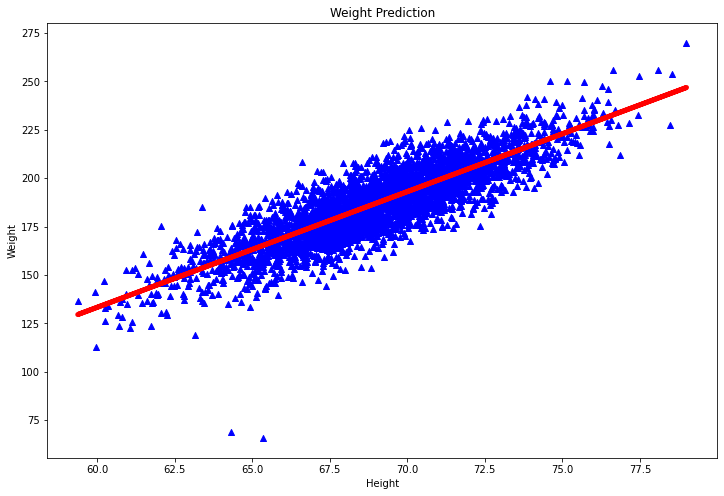

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height, df.Weight, marker='^', c='blue' )
plt.plot(df[['Height']], lr.predict(df[['Height']]), color='red',linewidth=5) #Height & Height must be same (actual vs Prediction)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight Prediction')
plt.show()

# Accuracy

In [54]:
# Testing Score
lr.score(xtest, ytest) # R_Squared Value by Test Data

0.7336885629218519

In [55]:
# RSqured value by full dataset
lr.score(df[['Height']], df.Weight) 

0.7320816356865

In [56]:
# Training Accuray by train dataset (R Squared Value by Trainset) 
lr.score(xtrain, ytrain)   

0.7314055218843845

# Excercise

#### A. Model Prediction (loaded data)

In [60]:
# xtest.to_csv('xtest.csv')

In [61]:
# Load test data for prediction/ excercise
df2 = pd.read_csv('xtest.csv')
df2.head()

,Unnamed: 0,Height
0,211,70.324753
1,1454,67.271615
2,2176,69.142273
3,912,77.160801
4,921,72.676961


In [62]:
# Dropping Unnamed col
df2 = df2.drop('Unnamed: 0', axis=1)  # axis = 1 or column
df2.head()

,Height
0,70.324753
1,67.271615
2,69.142273
3,77.160801
4,72.676961


In [63]:
df2.shape

(1051, 1)

#### Model Prediction - Practice 1

In [64]:
# Data Load (xtest)
lr.predict(df2[['Height']])

array([194.99121605, 176.73897536, 187.92212258, ..., 151.26093108,
       177.27969634, 179.46109106])

In [65]:
# Previous xtest data, same output
lr.predict(xtest)

array([194.99121605, 176.73897536, 187.92212258, ..., 151.26093108,
       177.27969634, 179.46109106])

### B. Model Prediction by brand new data

In [66]:
df3 = pd.read_csv('new_data.csv')
df3.head()

,Unnamed: 0,Height
0,211,68.5223
1,1454,66.4521
2,2176,80.5582
3,912,75.1145
4,921,70.9889


In [68]:
# Drop unnamed col
df3 = df3.drop('Unnamed: 0', axis='columns')
df3.head()

,Height
0,68.5223
1,66.4521
2,80.5582
3,75.1145
4,70.9889


In [69]:
df3.shape

(465, 1)

In [70]:
# Model Prediction by Brand new data
lr.predict(df[['Height']])

array([216.04797808, 185.76776877, 217.62077042, ..., 216.43974162,
       177.48269482, 209.42386211])

# Save ML Model

## Pickle

#### A. Save Model by Pickle

In [73]:
# Import & write binary (pickle model)
import pickle as pk

with open('lr_pkl_model', 'wb') as files:
    pk.dump(lr, files)

#### Read & Predict from Saved Model

In [75]:
# Read from same directory
with open('lr_pkl_model','rb') as files:
    lr2 = pk.load(files)

# Predict from saved model
lr2.predict(df2[['Height']])

array([194.99121605, 176.73897536, 187.92212258, ..., 151.26093108,
       177.27969634, 179.46109106])

### B. Saving Model at a time

In [76]:
pk.dump(lr, open('lr3', 'wb'))
lr4 = pk.load(open('lr3','rb'))
lr4.predict([[75]])

array([222.94072976])

In [77]:
lr.predict([[75]])

array([222.94072976])

### Joblib

#### D. Model Saved by Joblib

In [78]:
# Model save by Joblib
import joblib as jb
jb.dump(lr,'ml_jb_model')

# Load Saved Model
lr5 = jb.load('ml_jb_model')

# Prediction from saved model
lr5.predict([[75]])

array([222.94072976])

#### E. Model Saved by Joblib(Sklearn)

In [82]:
# import joblib
import sklearn.externals as extjoblib
import joblib
joblib.dump(lr,'model_joblib')

['model_joblib']

In [83]:
mj = joblib.load('model_joblib')
mj.predict([[75]])

array([222.94072976])

#### Ref:

https://matplotlib.org/stable/gallery/misc/set_and_get.html#sphx-glr-gallery-misc-set-and-get-py